# Research Topic: Uncovering the Public Sentiment Surrounding Whistleblowing  
As the world moved from the cold war to the modern era, it has not been necessarily a foreigner exposing private secrets, but now real members. These "whistleblowers," as they are called, are members of any organization that expose top secret information or activity that they deem illegal or unethical. 

Whistleblowing has consistently been seen as a very contentious issue with whistleblowers like Edward Snowden not only having thousands of people protest in support of his cause, but also some who succeeded in exiling him to Russia for his actions. This project investigates this dynamic, often violent, public sentiment surrounding the topic of whistleblowing. The goal of this project is to use the words of the public surrounding this topic and hopefully allow a greater sense of self-awareness to either motivate or discourage the act as we move deeper into its popularization and potential violence.



## Data
As my data source, I analyzed over 10,000 tweets regarding whistleblowing. I feel twitter is one of the optimal places to analyze this topic because often whistleblowing is not spreading via word-of-mouth in this modern era, but almost always like wildfire on social media platforms like twitter. Using the tweets, text analysis was performed to discover some of the choice words twitter users used to describe the action of whistleblowing in general. 


## Importing Project Tools Through Library Packages 

In [47]:
import tweepy 

import pandas as pd

import matplotlib 

%matplotlib inline

import matplotlib.pyplot as plt

In [116]:
!pip install wordcloud

from wordcloud import WordCloud

In [2]:
from string import punctuation

In [3]:
from collections import Counter

In [4]:
import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinniepanico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vinniepanico/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Connection to the Twitter API 

Authorizing to connect to the Twitter API:

In [5]:
auth = tweepy.OAuthHandler("8saQvc6N8hJpaxRK5WtaXnzom", "QrfWONKOj5ujn5hp0MJ4v4EbBQ3LY2IomcUo66FfOaV2GA8Kw8")
auth.set_access_token("1272990094971088903-KCos58Oiq1gPefMg0HTnxw1Hv3XLel", "5ZnuBpOekx3D0cEoEoa8lUvW0hyImhHoTVkFcXq8FD573")


api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [6]:
try:
    api.verify_credentials()
    print("Authentication Success")
except:
    print("Error during authentication")

Authentication Success


## Obtaining the Tweets from the Twitter Website

Using the API to query the term "whistleblowing whistleblower" and obtaining the most recent 10,000 tweets relating to the topic:

In [64]:
tweets = ""

twt = tweepy.Cursor(api.search,
              q="whistleblowing whistleblower",
              lang="en",
              since="2007-01-01").items(10000)
for tweet in twt:
    tweets += tweet.text

## Pre-processing the Data for Further Analysis

Removing punctuation and making every word lower case to avoid miscounts:

In [65]:
for char in punctuation:
    tweets = tweets.lower().replace(char, "")

Tokenizing the tweets using the split method and assigning the prepped words to the tokens variable name:

In [66]:
tokens = tweets.split()

Removing the stop words from the tokens variable and assigning the prepped tweets to the variable no_stops:

In [67]:
no_stops = [word for word in tokens if word not in stopwords.words('english')]

## Processing the Tweets to Obtain the 50 Most Frequent Words

Using the Counter function, the most_common method, and variable assignments to save a list of the 50 most common words:

In [119]:
WordFreq = Counter(no_stops)
WCFreq = WordFreq.most_common(5000)

## Creating Graphics to Portray the Data

Using the Pandas library and DataFrame method to create a data frame of the previously obtained 50 most common words and assigning it to the variable WCFreq_df:

In [69]:
WCFreq_df = pd.DataFrame(data = WCFreq, 
                         columns = ["Word", "Frequency"])

In [70]:
WCFreq_df

,Word,Frequency
0,whistleblowing,204
1,buckle,140
2,next,140
3,big,140
4,pushimpeach,140
5,barr,140
6,using,140
7,two,140
8,partisan,140
9,hacks,140


Using the matplotlib library to create a bar plot to portray the data:

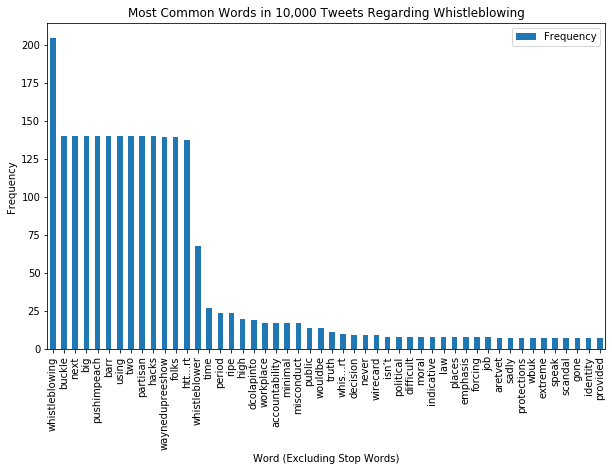

In [71]:
WCFreq_df.plot.bar(x = "Word", y = "Frequency", figsize = (10,6))

plt.xlabel("Word (Excluding Stop Words)")

plt.ylabel("Frequency")

plt.title("Most Common Words in 10,000 Tweets Regarding Whistleblowing")

plt.savefig("whistle_barplot.pdf", dpi = 800);

Creating a string out of the WCFreq and assigning it to the variable named text:

In [113]:
text = str(WCFreq)

Using the text variable string and creating a wordcloud from the wordcloud library:

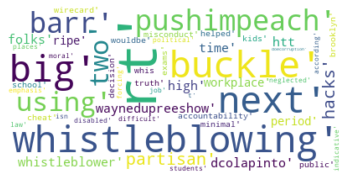

In [114]:
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Closing Remarks

Although the program came back with many unrelating words, there were a few crucial ones that really stood out in terms of sentiment. The words "pushimpeach" and "accountability" seem to draw on the post-exposure siding with whistleblowers, who many twitter users found must have "protections," to pursue further action on a public official caught in a "scandal" doing "misconduct." There failed to be any substantial amount of typical whistleblowing discouragment such as labeling them terrorists or traitors.

It is difficult to say with certainty that the public has a direct siding with whistleblowers, but this research certainly points towards the idea. Future, even more expansive, research on the topic could definitely help solidify the siding alluded to in this project. A possible future expansion on this research topic, that helps alleviate the assumption of all americans being on twitter and tweeting about whistleblowing, would be sending an email to non-twitter users asking for a short opinion on whistleblowing. 

The implications, though, of even a smaller project like this are vast. Not only does it give a sense that we should continue the process of whistleblowing and encourage it, but also gives direction to our democracy. The intense diction siding with the transparent whistelblowers could mean that there should be more public involvement in policy. If people are looking to find out more information in the government, alluded to in this project, maybe there should be more avenues for them to be involved in the governing process, such as more frequent elections or polling. All in all, this project serves as a foundation for not only greater understanding into a possible positive public outcry for whistleblowing, but also a future of more public involvement in governing. 
